# Chapter 04 - Introduction to neural learning: gradient descent

In [30]:
import matplotlib.pyplot as plt
import numpy as np

## Hot and cold learning

This is perhaps the simplest form of learning.

Unfortunately, it’s inefficient because you predict three times for each weight update,
and `step_amount` is arbitrary, which can prevent you from learning the correct weight value.

In [9]:
weight = 0.5
inpt = 0.5
goal_prediction = 0.8

step_amount = 0.001

for i in range(1101):

    prediction = inpt * weight
    error = (prediction - goal_prediction) ** 2
    print(f"{i}. Error: {error}. Prediction {prediction}.")

    up_prediction = inpt * (weight + step_amount)
    up_error = (goal_prediction - up_prediction) ** 2

    down_prediction = inpt * (weight - step_amount)
    down_error = (goal_prediction - down_prediction) ** 2

    if down_error < up_error:
        weight = weight - step_amount

    if down_error > up_error:
        weight = weight + step_amount

0. Error: 0.30250000000000005. Prediction 0.25.
1. Error: 0.3019502500000001. Prediction 0.2505.
2. Error: 0.30140100000000003. Prediction 0.251.
3. Error: 0.30085225. Prediction 0.2515.
4. Error: 0.30030400000000007. Prediction 0.252.
5. Error: 0.2997562500000001. Prediction 0.2525.
6. Error: 0.29920900000000006. Prediction 0.253.
7. Error: 0.29866224999999996. Prediction 0.2535.
8. Error: 0.29811600000000005. Prediction 0.254.
9. Error: 0.2975702500000001. Prediction 0.2545.
10. Error: 0.29702500000000004. Prediction 0.255.
11. Error: 0.29648025. Prediction 0.2555.
12. Error: 0.29593600000000003. Prediction 0.256.
13. Error: 0.2953922500000001. Prediction 0.2565.
14. Error: 0.294849. Prediction 0.257.
15. Error: 0.29430625. Prediction 0.2575.
16. Error: 0.293764. Prediction 0.258.
17. Error: 0.2932222500000001. Prediction 0.2585.
18. Error: 0.292681. Prediction 0.259.
19. Error: 0.29214025. Prediction 0.2595.
20. Error: 0.2916. Prediction 0.26.
21. Error: 0.2910602500000001. Predicti

## Calculating both direction and amount from error


In [16]:
weight = 0.5
inpt = 0.5
goal_prediction = 0.8

for i in range(20):
    pred = inpt * weight
    error = (pred - goal_prediction) ** 2
    direction_and_amount = (pred - goal_prediction) * inpt
    weight = weight - direction_and_amount

    print(f"{i}. Error: {error}. Prediction {pred}.")

0. Error: 0.30250000000000005. Prediction 0.25.
1. Error: 0.17015625000000004. Prediction 0.3875.
2. Error: 0.095712890625. Prediction 0.49062500000000003.
3. Error: 0.05383850097656251. Prediction 0.56796875.
4. Error: 0.03028415679931642. Prediction 0.6259765625.
5. Error: 0.0170348381996155. Prediction 0.669482421875.
6. Error: 0.00958209648728372. Prediction 0.70211181640625.
7. Error: 0.005389929274097089. Prediction 0.7265838623046875.
8. Error: 0.0030318352166796153. Prediction 0.7449378967285156.
9. Error: 0.0017054073093822882. Prediction 0.7587034225463867.
10. Error: 0.0009592916115275371. Prediction 0.76902756690979.
11. Error: 0.0005396015314842384. Prediction 0.7767706751823426.
12. Error: 0.000303525861459885. Prediction 0.7825780063867569.
13. Error: 0.00017073329707118678. Prediction 0.7869335047900676.
14. Error: 9.603747960254256e-05. Prediction 0.7902001285925507.
15. Error: 5.402108227642978e-05. Prediction 0.7926500964444131.
16. Error: 3.038685878049206e-05. Pred

## One iteration of gradient descent

This performs a weight update for a single training example.

In [17]:
weight = 0.1
alpha = 0.01


def neural_network(inpt, weight):
    prediction = inpt * weight
    return prediction


number_of_toes = [8.5]
win_or_lose_binary = [1]  # won!!!

inpt = number_of_toes[0]
goal_prediction = win_or_lose_binary[0]

pred = neural_network(inpt, weight)

error = (pred - goal_prediction) ** 2
delta = pred - goal_prediction
weight_delta = inpt * delta

weight -= weight_delta * alpha

## Breaking gradient descent

=== Iteration: 1
Weight: 0.5
Error: 0.03999999999999998. Prediction: 1.0.
Delta: 0.007408799999999993. Weight delta: 0.008149679999999992.
=== Iteration: 2
Weight: 0.475
Error: 0.022499999999999975. Prediction: 0.95.
Delta: 0.007408799999999993. Weight delta: 0.008149679999999992.
=== Iteration: 3
Weight: 0.45625
Error: 0.012656249999999985. Prediction: 0.9125.
Delta: 0.007408799999999993. Weight delta: 0.008149679999999992.
=== Iteration: 4
Weight: 0.4421875
Error: 0.0071191406249999966. Prediction: 0.884375.
Delta: 0.007408799999999993. Weight delta: 0.008149679999999992.
=== Iteration: 5
Weight: 0.431640625
Error: 0.004004516601562495. Prediction: 0.86328125.
Delta: 0.007408799999999993. Weight delta: 0.008149679999999992.
=== Iteration: 6
Weight: 0.42373046875
Error: 0.0022525405883788976. Prediction: 0.8474609375.
Delta: 0.007408799999999993. Weight delta: 0.008149679999999992.
=== Iteration: 7
Weight: 0.4177978515625
Error: 0.00126705408096313. Prediction: 0.835595703125.
Delta: 

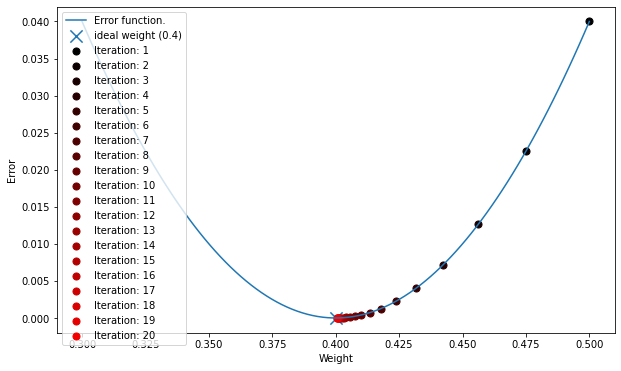

In [155]:
weight = 0.5
goal_pred = 0.8
inpt = 2
alpha = 0.25

plt.figure(figsize=(10, 6))

X = np.linspace(.3, .5, 100)
Y = ((inpt * X) - goal_pred) ** 2
plt.plot(X, Y, label=f"Error function.")
plt.scatter(goal_pred / inpt, 0, marker="x", s=150,
            label=f"ideal weight ({round(goal_pred / inpt, 2)})"
            )

iters = 20

def get_next_red(i, max=iters):
    val = int(i * 255 / max)
    col = "#" + hex(val * 256 * 256).replace("0x", "").zfill(6).upper()
    return col

for i in range(iters):
    red = get_next_red(i)
    print(f"=== Iteration: {i + 1}")
    print(f"Weight: {weight}")
    pred = inpt * weight
    error = (pred - goal_pred) ** 2
    plt.scatter(weight, error, s=50, color=red,
                label=f"Iteration: {i + 1}"
                )

    derivative = input * (pred - goal_pred)
    weight = weight - alpha * derivative

    # X = np.linspace(0, 1, 100)
    # Y = weight_delta * X + error
    # plt.plot(X,Y, color=red, linestyle=":")

    print(f"Error: {error}. Prediction: {pred}.")
    print(f"Delta: {delta}. Weight delta: {weight_delta}.")

plt.xlabel("Weight")
plt.ylabel("Error")
plt.legend()

'#ff0000'